In [10]:
import pandas as pd

df = pd.read_csv('vehicle.csv')

In [11]:
df.head()

,id,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,1,85,45,80,154,64,9,147,45,19,148,169,324,174,71,1,4,188,199,positive
1,2,93,35,78,162,60,8,150,45,19,125,172,331,137,67,2,33,191,198,negative
2,3,108,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199,negative
3,4,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188,positive
4,5,100,58,109,230,70,11,226,30,25,182,234,752,207,72,0,13,187,198,negative


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       846 non-null    int64 
 1   Compactness              846 non-null    int64 
 2   Circularity              846 non-null    int64 
 3   Distance_circularity     846 non-null    int64 
 4   Radius_ratio             846 non-null    int64 
 5   Praxis_aspect_ratio      846 non-null    int64 
 6   Max_length_aspect_ratio  846 non-null    int64 
 7   Scatter_ratio            846 non-null    int64 
 8   Elongatedness            846 non-null    int64 
 9   Praxis_rectangular       846 non-null    int64 
 10  Length_rectangular       846 non-null    int64 
 11  Major_variance           846 non-null    int64 
 12  Minor_variance           846 non-null    int64 
 13  Gyration_radius          846 non-null    int64 
 14  Major_skewness           846 non-null    i

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Define the input features and target variable
X = df.iloc[:, :-1]   # all columns except the last one
y = df.iloc[:, -1]    # the last column

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree model
tree_model = DecisionTreeClassifier()

# Train the model on the training set
tree_model.fit(X_train, y_train)

# Predict the class labels of the testing set
y_pred = tree_model.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9529411764705882


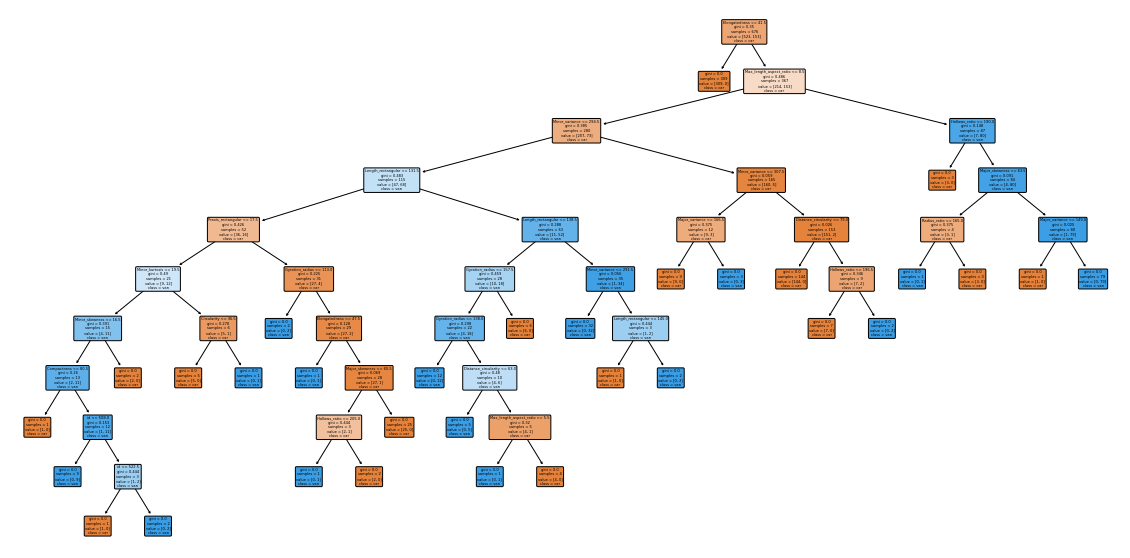

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, rounded=True, feature_names=X.columns, class_names=['car', 'van', 'bus'])
plt.show()